Import Necessary modules

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Reading Data Set

In [70]:
dataset = pd.read_csv('/content/LoanApprovalPrediction.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
dataset.info()
obj  =  (dataset.dtypes == 'object')
print('Categorical variables:',len(list(obj[obj].index)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB
Categorical variables: 7


Here, Loan_ID is completely unique and not correlated and dependent with any other column. so we can drop it.

In [72]:
dataset.drop(['Loan_ID'],axis=1,inplace=True)

[487, 111]
['Male', 'Female']
[388, 210]
['Yes', 'No']
[465, 133]
['Graduate', 'Not Graduate']
[488, 110]
['No', 'Yes']
[225, 198, 175]
['Semiurban', 'Urban', 'Rural']
[411, 187]
['Y', 'N']


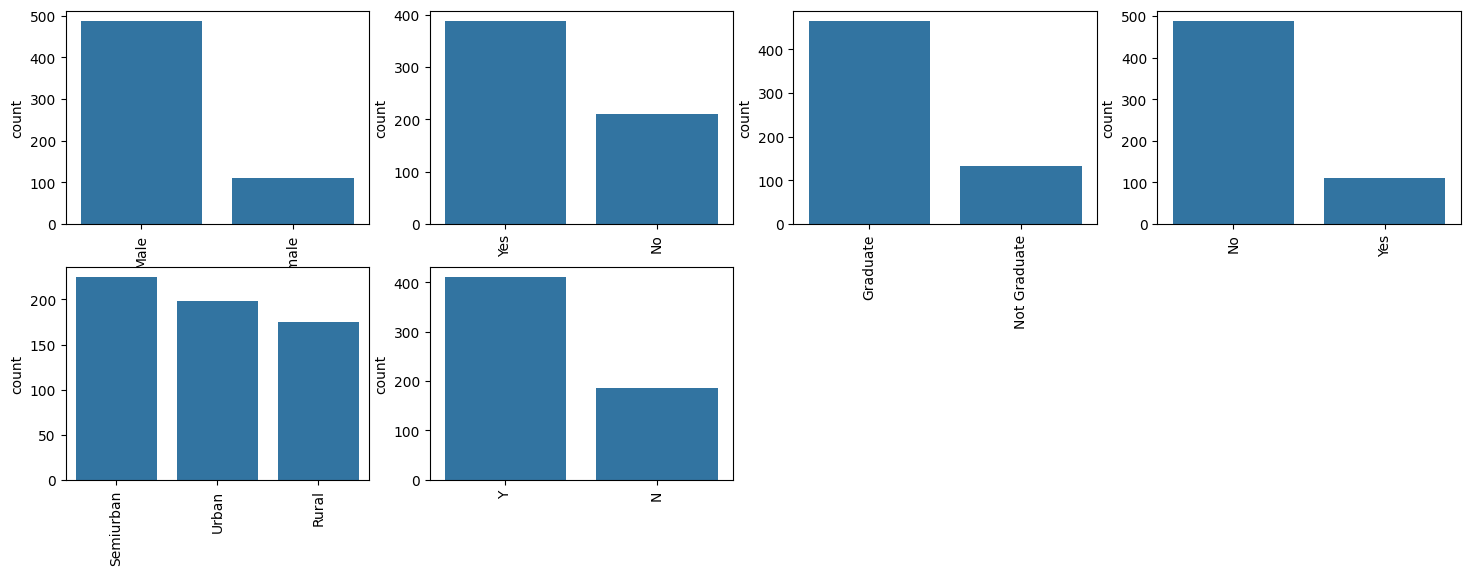

In [73]:
obj = (dataset.dtypes == 'object')
# print(obj)
object_cols = list(obj[obj].index)
# print(object_cols)
plt.figure(figsize=(18,36))
index=1
for col in object_cols:
  y = dataset[col].value_counts()
  print(list(y))
  print(list(y.index))
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index),y=y)
  index+=1

We found that ,there are categorical values , so we need to convert them to numericals to use for machine learning models. So , here we use label Encoder to make them numerical.

In [74]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (dataset.dtypes=="object")
for col in list(obj[obj].index):
  dataset[col] = label_encoder.fit_transform(dataset[col])
  # print(dataset[col].dtype)

In [75]:
obj = (dataset.dtypes=="object")
print('categorical variables:',len(list(obj[obj].index)))
print(dataset.info())

categorical variables: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 56.2 KB
None


Lets Find out coorelation between variables and understand them.

In [76]:
# cols = ['LoanAmount','ApplicantIncome','Credit_History','Loan_Status']
print(dataset.head(15))

    Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0        1        0         0.0          0              0             5849   
1        1        1         1.0          0              0             4583   
2        1        1         0.0          0              1             3000   
3        1        1         0.0          1              0             2583   
4        1        0         0.0          0              0             6000   
5        1        1         2.0          0              1             5417   
6        1        1         0.0          1              0             2333   
7        1        1         3.0          0              0             3036   
8        1        1         2.0          0              0             4006   
9        1        1         1.0          0              0            12841   
10       1        1         2.0          0              0             3200   
11       1        1         2.0          0              1       

<Axes: >

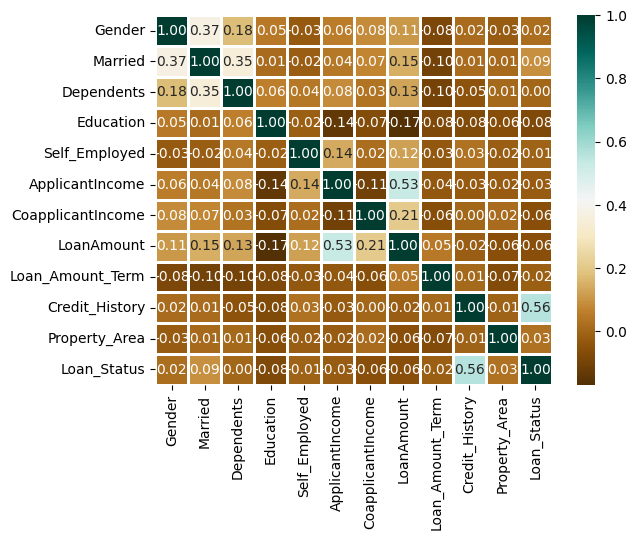

In [77]:
sns.heatmap(dataset.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

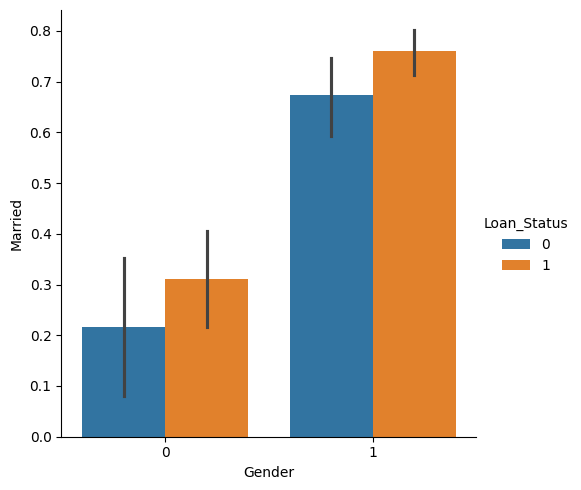

In [78]:
sns.catplot(x='Gender',y='Married',hue='Loan_Status',kind='bar',data=dataset)

In [79]:
dataset.isnull().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


There are more Null values we found in the dataset, Lets start with filling them using mean()

In [80]:
for col in dataset.columns:
  dataset[col] = dataset[col].fillna(dataset[col].mean())
dataset.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


Lets start with splitting the dataset into training and testing set

In [81]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Loan_Status'],axis=1)
Y = dataset['Loan_Status']
X.shape,Y.shape
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((358, 11), (240, 11), (358,), (240,))

As this is a classification Problem so we will be using train and test our dataset on these models:
Kneighboursclassifiers,
randomforestclasifier,
Support vector classifier,
logistic regression

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
svc = SVC()
lc = LogisticRegression()

for clf in (rfc,knn,svc,lc):
  clf.fit(X_train, Y_train)
  Y_predict = clf.predict(X_train)
  print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_train, Y_predict))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.16759776536313


Testing metrics

In [83]:
for clf in (rfc,knn,svc,lc):
  clf.fit(X_train, Y_train)
  Y_predict = clf.predict(X_test)
  print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_test, Y_predict))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.41666666666667


**Conclusion :** Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset.

Advance: Adding UI and Interactive
Model : Random Forest

In [84]:
import joblib
final_model = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
final_model.fit(X_train,Y_train)

#save model
joblib.dump(final_model,'loan_model.pkl')

['loan_model.pkl']